In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("covid_toy.csv", usecols = ['age','fever','has_covid'])
df.head()

,age,fever,has_covid
0,60,103.0,No
1,27,100.0,Yes
2,42,101.0,No
3,31,98.0,No
4,65,101.0,No


In [4]:
df.isnull().sum()

age           0
fever        10
has_covid     0
dtype: int64

In [5]:
df['fever'].fillna(df['fever'].mean(), inplace = True)

In [6]:
df.isnull().sum()

age          0
fever        0
has_covid    0
dtype: int64

In [7]:
df.duplicated().sum()

6

In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

y_train.head()

55    Yes
88     No
26    Yes
42    Yes
69     No
Name: has_covid, dtype: object

C:\Users\DELL\AppData\Local\Temp\ipykernel_8684\1283423182.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'])


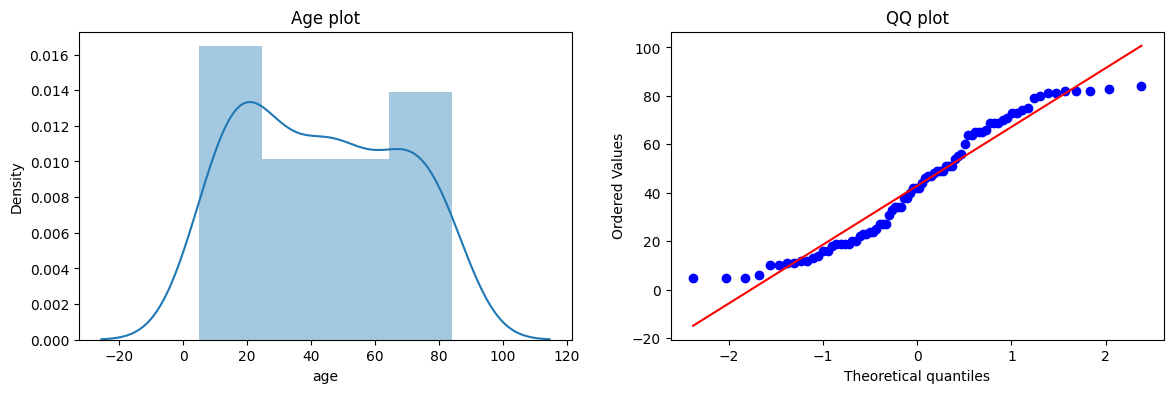

In [13]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['age'])
plt.title("Age plot")

plt.subplot(122)
stats.probplot(X_train['age'], dist = 'norm', plot = plt)
plt.title("QQ plot")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8684\2987560972.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['fever'])


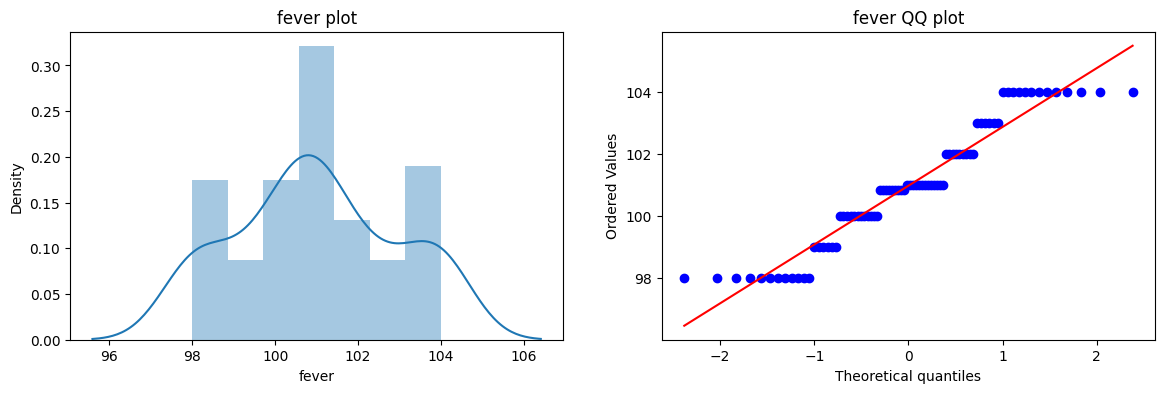

In [14]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['fever'])
plt.title("fever plot")

plt.subplot(122)
stats.probplot(X_train['fever'], dist = 'norm', plot = plt)
plt.title("fever QQ plot")
plt.show()

In [15]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy score of LR: ", accuracy_score(y_test, y_pred))
print("Accuracy score of DT:", accuracy_score(y_test, y_pred2))

Accuracy score of LR:  0.65
Accuracy score of DT: 0.45


In [16]:
trf = FunctionTransformer(func = np.log1p)

In [17]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [18]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("Accuracy score of LR: ", accuracy_score(y_test, y_pred))
print("Accuracy score of DT:", accuracy_score(y_test, y_pred2))

Accuracy score of LR:  0.6
Accuracy score of DT: 0.4


In [28]:
def apply_transform(transform):
    X = df.iloc[:,0:2]
    y = df.iloc[:,-1]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['age','fever'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['age'], dist="norm", plot=plt)
    plt.title('age Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('age After Transform')

    plt.show()

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['fever'], dist="norm", plot=plt)
    plt.title('fever Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,1], dist="norm", plot=plt)
    plt.title('fever After Transform')

    plt.show()

Accuracy 0.5


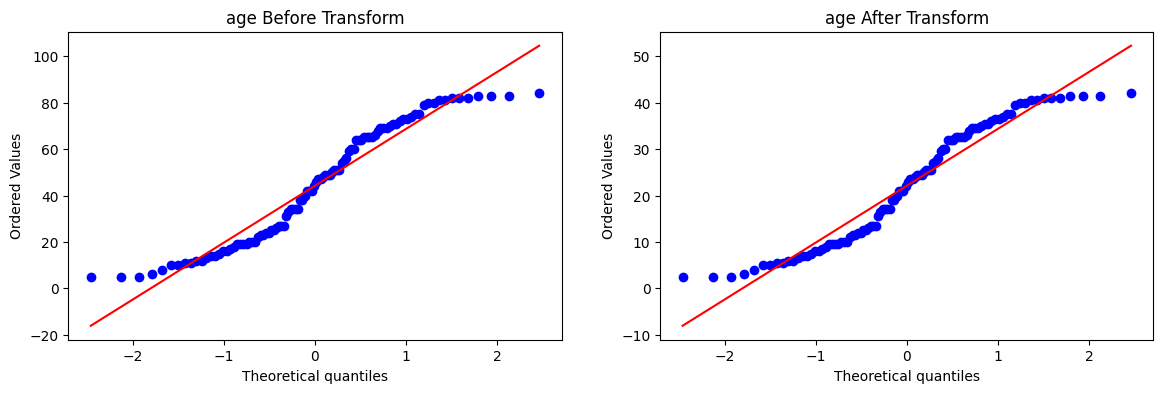

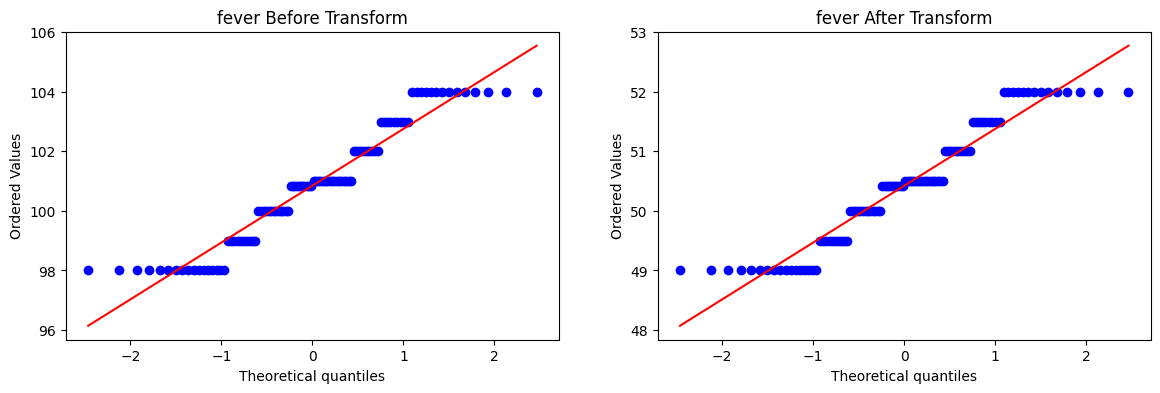

In [29]:
apply_transform(lambda x: X**1/2)